# **Practical 1**


---
Name      : Aayush Shah                                       
Roll no. : 19BCE241                                                                                                         
Course    : Machine Learning(2CS501)                                                                                        
Practical : 1                                                                                                                   
Aim       : Use pytesseract library in Python for optical character recognition from                                           
            (i) an image file (ii) a multi-page pdf file

In [ ]:
# Installation of required packages in google colab
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# Importing packages
import pytesseract
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Uploaded png image named 'MyPetDog'
from google.colab import files
# uploaded = files.upload()

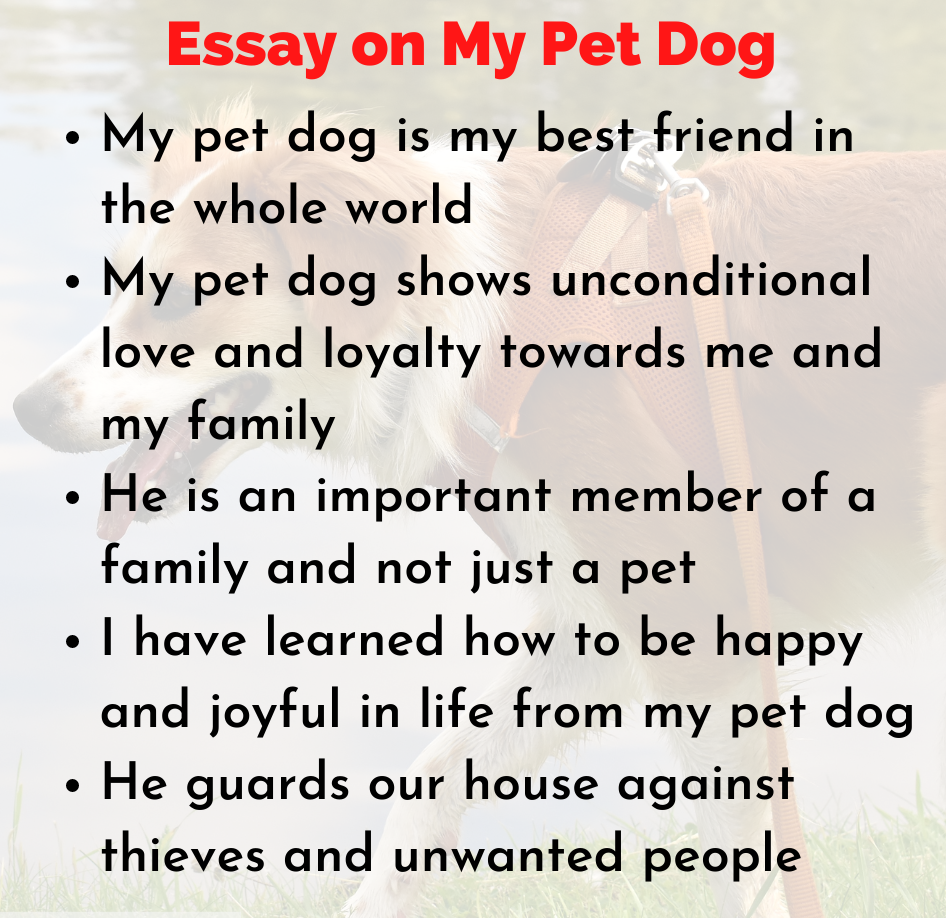

Text extracted from the image :  
 Essay on My Pet Dog

« My pet dog is my best friend in
the whole world

« My pet dog shows unconditional
love and loyalty towards me and
my family

« He is an important member of a
family and not just a pet

« | have learned how to be happy
and joyful in life from my pet dog

« He guards our house against
thieves and unwanted people



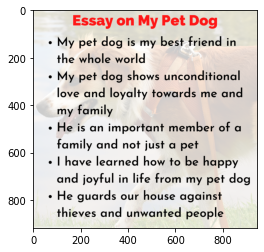

In [ ]:
# Setting path and extracting text.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
img = cv2.imread('MyPetDog.png')
img1 = Image.open('MyPetDog.png')
cv2_imshow(img)
plt.imshow(img1)
ocrinfo = pytesseract.image_to_string(img1)   #can be either img or img1; both works!
print('Text extracted from the image : ','\n',ocrinfo)

# **Explanation :**
---
1. Imported pytesseract and tesseract-ocr packages which are used for optical character recognition engine for various operating systems. These will recognize and “read” the text embedded in images.
2. Then path for the tesseract library is set using 'pytesseract.pytesseract.tesseract_cmd'.
3. Using cv2's imread function, image is loaded from the path.
4. Then, using pytesseract's image_to_string function, the text from the image will be extracted and stored in the ocrinfo variable.
5. The extracted image and text are shown in the output using pytesseract, cv2, matplotlib and PIL packages.



# PDF to Text
---



In [ ]:
!pip install pdf2image

In [ ]:
from PIL import Image
import pytesseract
import sys
from pdf2image import convert_from_path
import os
import pathlib

In [ ]:
# !apt-get install poppler-utils
# pathlib.Path('/generated_images/').mkdir(parents=True, exist_ok=True)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
PDF_file = "DogsAsHumanCompanions.pdf"
pages = convert_from_path(PDF_file, 500)
image_counter = 1
for page in pages:
  filename = "page_"+str(image_counter)+".jpg"
  page.save(filename, 'JPEG')
  image_counter = image_counter + 1

filelimit = image_counter-1

extracted_text = ''

for i in range(1, filelimit + 1):
  filename = "page_"+str(i)+".jpg"
  text = str(((pytesseract.image_to_string(Image.open(filename)))))
  text = text.replace('-\n', '')
  extracted_text += text

In [ ]:
print('Extracted text : \n',text)

Extracted text : 
 their pets, the dog owners averaged 35.3 hours per week and the cat owners averaged
33.2 hours. For dog owners, 44% of this time was estimated as play, as compared with
36% for cat owners (J. Angus, personal communication).

Fig. 12.5. Attraction of young children to animals. Young toddlers respond to both
mechanical and live dogs, but a real dog elicits the stronger interest (Kidd & Kidd, 1987).
Photograph: Joan Borinstein.

Touch

A study of three- to four-year-old children’s interactions with dogs revealed that 67% of
these interactions involved body contact with the dog, such as putting a hand on the dog,
patting it or hitting it. In contrast, vocal and verbal behavior comprised only 9% of the
interactions (Millot & Filiatre, 1986). In a subsequent study touching was again the most
frequent behavior shown in the presence of a dog, accounting for 40% of all child-dog
interactions (Filiatre et al., 1988).

In an analysis of 1105 photographs of dogs or cats in a fam

# Explanation : 

---
1. Imported package named pdf2Image which used to convert PDF to PIL Image object.
2. Generated file name based on the number of pages in pdf. Then generated images in for loop with the file name generated above.
3. Extracted the text from the image in the same way as we have previously done. Created empty string variable named extracted_text and appended every image's extracted text to it.
4. Displayed the extracted text as output.

# Limitations : 

---

1. By doing trial and error on this package, I came to know that it's accuracy is not as good and not as fast as the currently google's mobile app google lens is providing.
2. It is also not capable of recognizing handwritten text as apple's ipad does.
3. Also if the file contain the text written in two or more columns, then it might fail to recognize this pattern and can result in absurd text string.

# Conclusion : 

---

From this practical, I learned about the optical character recognition tool for python named pytesseract. Pytesseract is able to read and extract the text from files types like images, pdfs etc. with the use of this library, one can easily implement great ocr features in their apps and projects without significant effort.